In [1]:
from keras.applications import vgg16
from keras.utils import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [2]:
img_path = '/kaggle/input/clothing-dataset-full/images_compressed/'
img_mw, img_mh = 224, 224

nearest_img = 5

In [3]:
vgg_model = vgg16.VGG16(weights = 'imagenet')
extractor = Model(
    inputs = vgg_model.input,
    outputs = vgg_model.get_layer('fc2').output,
)

extractor.summary()

553467096/553467096 [==============================] - 18s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [4]:
files = [img_path + i for i in os.listdir(img_path) if 'jpg' in i]
f'number of images: {len(files)}'

'number of images: 5762'

In [5]:
img = []

for f in files:
    filename = f
    try:
        og = load_img(filename, target_size = (224, 224))
    except:
        pass
    np_img = img_to_array(og)
    img_batch = np.expand_dims(np_img, axis = 0)
    img.append(img_batch)

imgs = np.vstack(img)
pros_img = preprocess_input(imgs.copy())

In [6]:
features = extractor.predict(pros_img)
features.shape

181/181 [==============================] - 1641s 9s/step


(5762, 4096)

In [7]:
cossim = cosine_similarity(features)
cossin_df = pd.DataFrame(cossim, columns = files, index = files)
cossin_df.head()

/kaggle/input/clothing-dataset-full/images_compressed/d619091d-fc8d-4730-9f3c-2a042e876272.jpg  \
/kaggle/input/clothing-dataset-full/images_comp...                                           1.000000                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.396970                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.452898                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.504692                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.274505                                                

                                                    /kaggle/input/clothing-dataset-full/images_compressed/b0d71fba-23a7-4912-b6c6-16b7d8a5bd43.jpg  \
/kaggle/input/clothing-dataset-full/images_comp...                                           0.396970                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           1.000000                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.408841                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.388664                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.384203                                                

                                                    /kaggle/input/clothing-dataset-full/images_compressed/7f17b410-d375-409e-b5b3-010122df5748.jpg  \
/kaggle/input/clothing-dataset-full/images_comp...                                           0.452898                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.408841                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           1.000000                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.590483                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.539069                                                

                                                    /kaggle/input/clothing-dataset-full/images_compressed/a1935717-7c7e-448c-9359-9c958ebbd2eb.jpg  \
/kaggle/input/clothing-dataset-full/images_comp...                                           0.504692                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.388664                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.590483                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           1.000000                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.508338                                                

                                                    /kaggle/input/clothing-dataset-full/images_compressed/638f066a-218c-4850-9771-4883a908d6a3.jpg  \
/kaggle/input/clothing-dataset-full/images_comp...                                           0.274505                                                
/kaggle/input/clothing-dataset-full/images_comp...                                           0.384203                                               

In [8]:
def simprod(x):
    print('''
    --------------------------------------------------------------------------------
    ''')
    og = load_img(x, target_size = (img_mw, img_mh))
    plt.imshow(og)
    plt.show()
    print('''
    --------------------------------------------------------------------------------
    ''')
    c_img = cossin_df[x].sort_values(ascending = False)[1: nearest_img + 1].index
    
    for i in range(len(c_img)):
        og = load_img(c_img[i], target_size = (img_mw, img_mh))
        plt.imshow(og)
        plt.show()


    --------------------------------------------------------------------------------
    


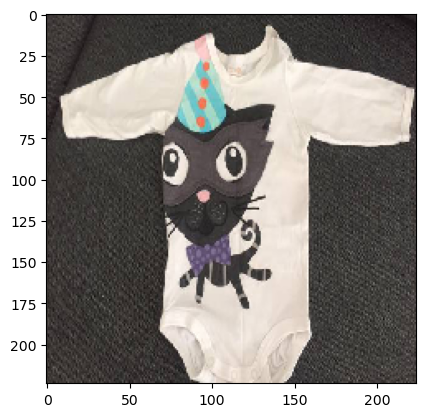


    --------------------------------------------------------------------------------
    


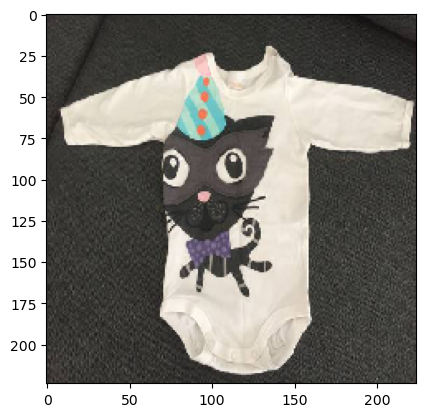

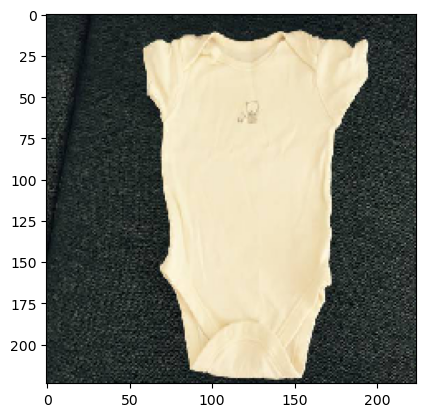

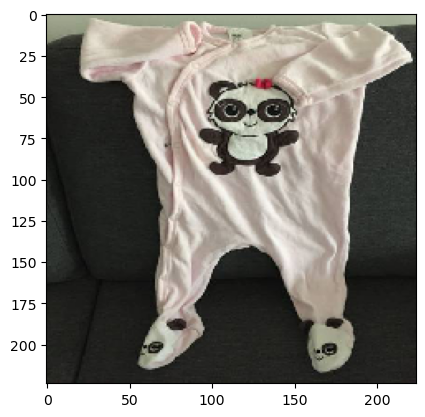

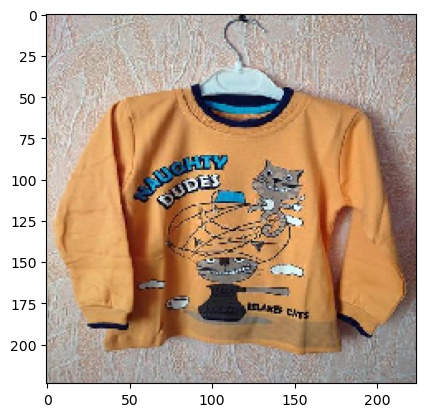

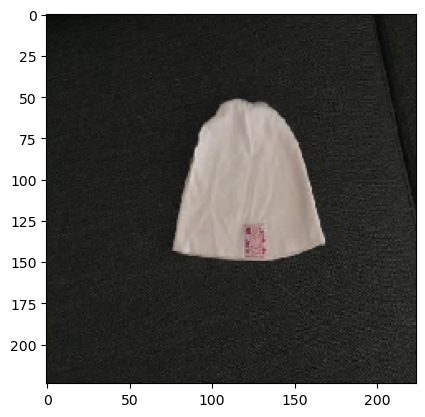

In [9]:
simprod(files[1])


    --------------------------------------------------------------------------------
    


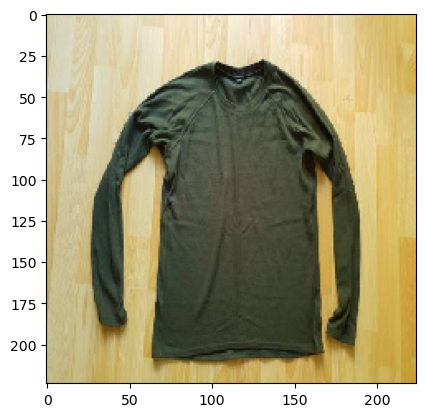


    --------------------------------------------------------------------------------
    


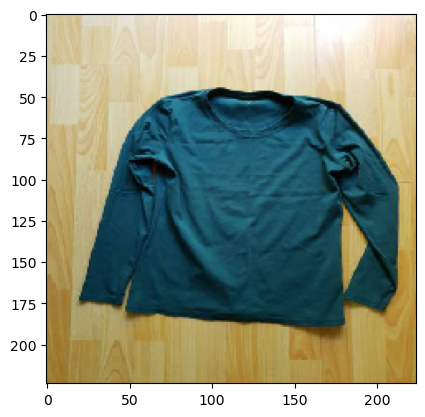

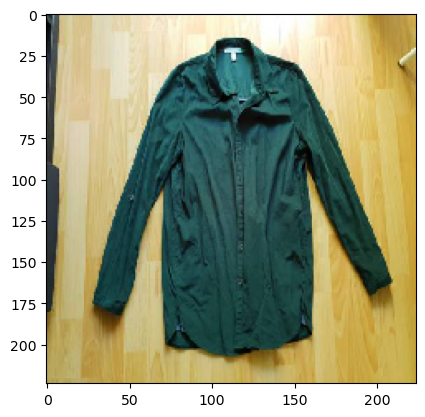

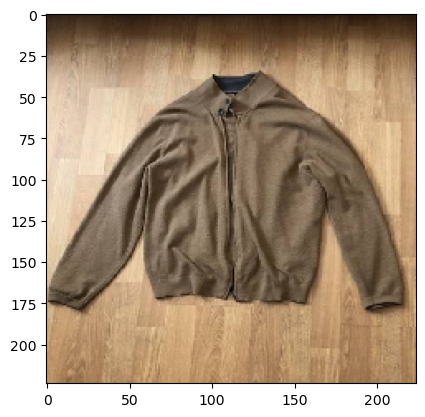

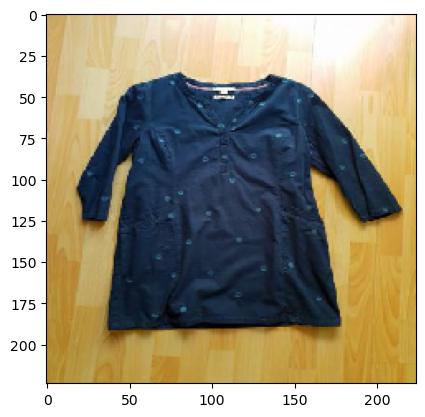

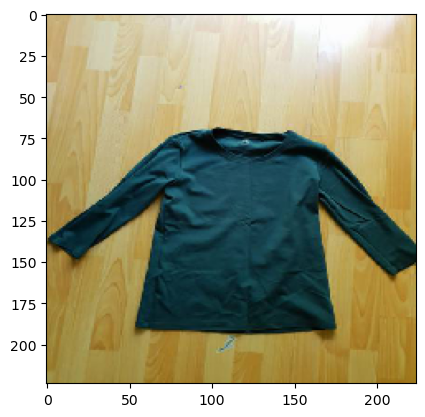

In [11]:
simprod(files[2])


    --------------------------------------------------------------------------------
    


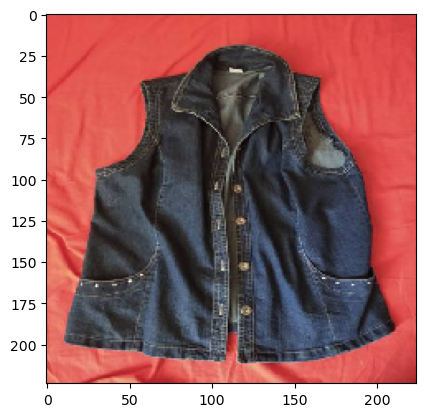


    --------------------------------------------------------------------------------
    


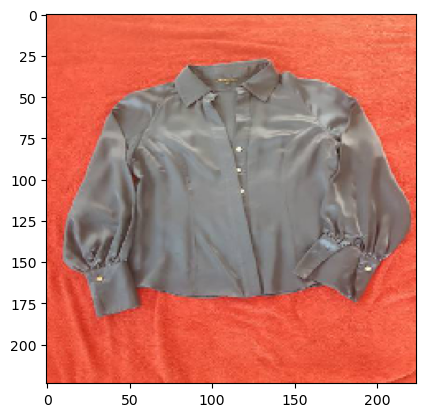

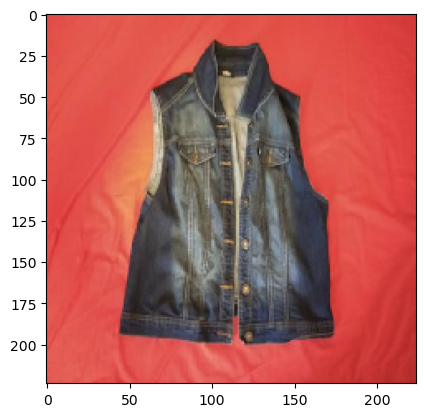

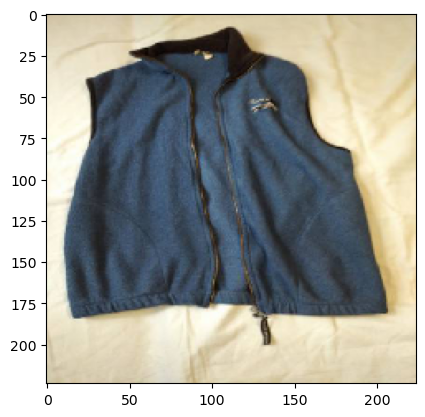

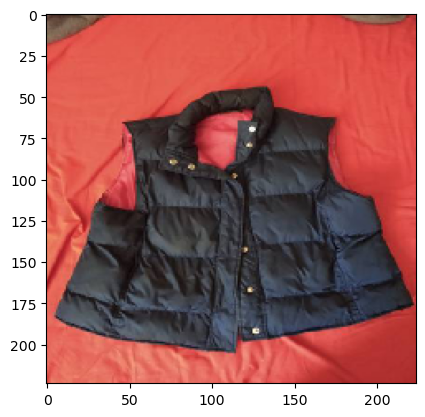

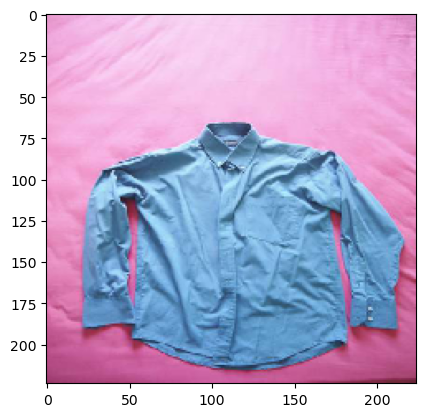

In [12]:
simprod(files[3])